In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
import spacy

In [2]:
# avoid decoding problems
df = pd.read_csv("G:\\machine_learning\\case_study\\Quora\\train.csv")
 
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('G:\\machine_learning\\case_study\\Quora\\nlp_features_train.csv'):
    dfnlp = pd.read_csv("G:\\machine_learning\\case_study\\Quora\\nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('G:\\machine_learning\\case_study\\Quora\\df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("G:\\machine_learning\\case_study\\Quora\\df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [5]:
df1 = dfnlp.drop(['id','qid1','qid2','question1','question2'],axis=1)
df2 = dfppro.drop(['id','qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = df.drop(['id','qid1','qid2','is_duplicate'],axis=1)

In [6]:
df4 = df1.join(df2)

In [7]:
df5 = df4.join(df3)

In [8]:
df5

,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,...,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,question1,question2
0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,...,57,14,12,10.0,23.0,0.434783,2,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,...,88,8,13,4.0,20.0,0.200000,5,3,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,...,59,14,10,4.0,24.0,0.166667,2,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,...,65,11,9,0.0,19.0,0.000000,2,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,...,39,13,7,2.0,20.0,0.100000,4,2,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,0,0.857131,0.857131,0.999980,0.833319,0.846147,0.785709,1.0,1.0,1.0,...,79,14,13,11.0,25.0,0.440000,4,0,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...
404286,1,0.666644,0.666644,0.599988,0.599988,0.624992,0.555549,1.0,0.0,1.0,...,42,8,9,5.0,16.0,0.312500,13,11,Do you believe there is life after death?,Is it true that there is life after death?
404287,0,0.999900,0.499975,0.999950,0.666644,0.749981,0.749981,1.0,1.0,0.0,...,17,4,3,1.0,7.0,0.142857,2,0,What is one coin?,What's this coin?
404288,0,0.000000,0.000000,0.124998,0.099999,0.058823,0.040000,0.0,0.0,8.0,...,127,17,25,1.0,40.0,0.025000,2,0,What is the approx annual cost of living while...,I am having little hairfall problem but I want...


In [9]:
df3

,question1,question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?
...,...,...
404285,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...
404286,Do you believe there is life after death?,Is it true that there is life after death?
404287,What is one coin?,What's this coin?
404288,What is the approx annual cost of living while...,I am having little hairfall problem but I want...


In [10]:
df5.shape

(404290, 29)

In [11]:
df_final = df5[0:100000]

In [12]:
from sklearn.model_selection import train_test_split
y_true = df_final['is_duplicate']
df_final1 = df_final.drop(['is_duplicate'],axis=1)

In [13]:
X_train,X_test, y_train, y_test = train_test_split(df_final1, y_true, test_size=0.3)

In [14]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (70000, 28)
Number of data points in test data : (30000, 28)


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = (X_train['question1']) + (X_train['question2'])
questions1 = (X_test['question1']) + (X_test['question2'])

tfidf = TfidfVectorizer(lowercase=False, )
x_train_data = tfidf.fit_transform(questions)
x_test_data = tfidf.transform(questions1)



In [16]:
x_train_final = X_train.drop(['question1','question2'],axis=1)
x_test_final = X_test.drop(['question1','question2'],axis=1)

In [17]:
from scipy.sparse import hstack

x_train_final_data = hstack((x_train_data,x_train_final)).tocsr()
x_test_final_data = hstack((x_test_data,x_test_final)).tocsr()

In [18]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

4.4 Logistic Regression with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.41174775245813044
For values of alpha =  0.0001 The log loss is: 0.42612839037450145
For values of alpha =  0.001 The log loss is: 0.43232417292253766
For values of alpha =  0.01 The log loss is: 0.46729035838984345
For values of alpha =  0.1 The log loss is: 0.46509339157119073
For values of alpha =  1 The log loss is: 0.4993668911341836
For values of alpha =  10 The log loss is: 0.549998771104127


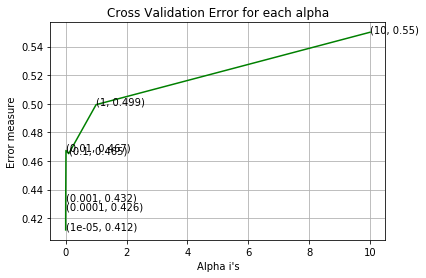

For values of best alpha =  1e-05 The train log loss is: 0.40486775920825946
For values of best alpha =  1e-05 The test log loss is: 0.41174775245813044
Total number of data points : 30000


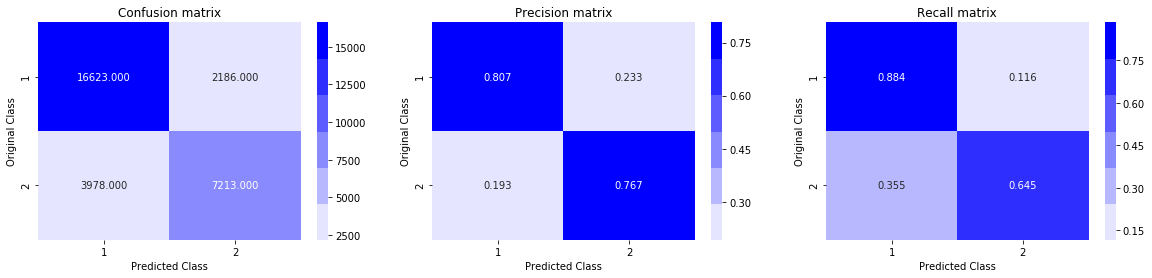

In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
import seaborn as sns
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(x_train_final_data, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train_final_data, y_train)
    predict_y = sig_clf.predict_proba(x_test_final_data)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(x_train_final_data, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_final_data, y_train)

predict_y = sig_clf.predict_proba(x_train_final_data)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test_final_data)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

4.5 Linear SVM with hyperparameter tuning 

For values of alpha =  1e-05 The log loss is: 0.42641328735466766
For values of alpha =  0.0001 The log loss is: 0.45817853229767475


C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hemant\AnacondaNew\

For values of alpha =  0.001 The log loss is: 0.4698505581468644


C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hemant\AnacondaNew\

For values of alpha =  0.01 The log loss is: 0.5232135613932204
For values of alpha =  0.1 The log loss is: 0.5210658082976192


C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


For values of alpha =  1 The log loss is: 0.5759456054589881
For values of alpha =  10 The log loss is: 0.6446213109810796


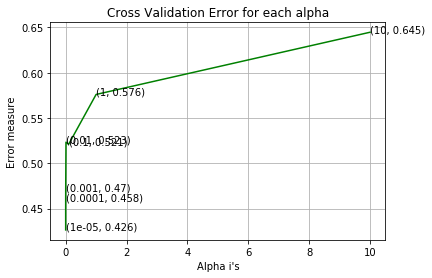

For values of best alpha =  1e-05 The train log loss is: 0.4191456275483644
For values of best alpha =  1e-05 The test log loss is: 0.42641328735466766
Total number of data points : 30000


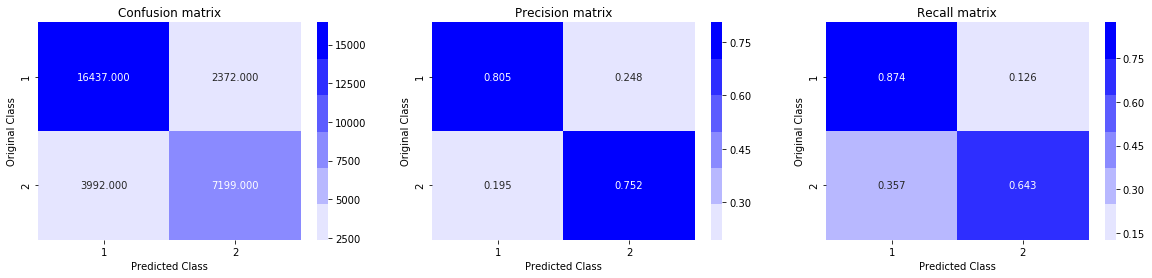

In [20]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(x_train_final_data, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train_final_data, y_train)
    predict_y = sig_clf.predict_proba(x_test_final_data)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(x_train_final_data, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_final_data, y_train)

predict_y = sig_clf.predict_proba(x_train_final_data)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test_final_data)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

#TF-IDF W2V for xgboost

In [21]:


# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [22]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(questions)):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
#df['q1_feats_m'] = list(vecs1)


100%|████████████████████████████████████| 70000/70000 [19:35<00:00, 59.56it/s]


In [23]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

vecs2 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(questions1)):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs2.append(mean_vec1)
#df['q1_feats_m'] = list(vecs1)


100%|████████████████████████████████████| 30000/30000 [08:26<00:00, 59.27it/s]


In [24]:
first = pd.DataFrame(vecs1)

In [25]:
second = pd.DataFrame(vecs2)

In [26]:
xg_train = hstack((first,x_train_final))
xg_test = hstack((second,x_test_final))

4.6 XGBoost

In [65]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV


#base_learners = [5,10,15,20]
Depths = [1,2,3,4]
#learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
#reg_lambda = [0.1, 1.0, 5.0, 10.0, 50.0, 100.0]


neigh = xgb.XGBRegressor()
#params we need to try on classifier
param_grid = {'max_depth':Depths}
#tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
clf = RandomizedSearchCV(neigh,param_grid,cv=2,verbose=1)
clf.fit(xg_train,y_train)


C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  6.9min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=True, subsample=1),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distribut

In [66]:
# Optimal value of number of base learners
#optimal_learners = clf.best_estimator_.n_estimators
#print("The optimal number of base learners is : ",optimal_learners)

# Optimal value of depth
optimal_depth = clf.best_estimator_.max_depth
print("\nThe optimal value of depth is : ",optimal_depth)

"""
optimal_learning_rate = clf.best_estimator_.learning_rate
print("\nThe optimal value of learning rate is : ",optimal_learning_rate)


optimal_reg_lambda = clf.best_estimator_.reg_lambda
print("\nThe optimal value of learning rate is : ",optimal_reg_lambda)
"""
#optimal_learners_data = optimal_learners
optimal_depth_data = optimal_depth
#optimal_learning_rate_data = optimal_learning_rate
#optimal_reg_lambda_data = optimal_reg_lambda




The optimal value of depth is :  4


In [76]:

model = xgb.XGBRegressor(max_depth = int(optimal_depth))
model.fit(xg_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
             subsample=1)

In [74]:
from sklearn.metrics import log_loss
probs = model.predict(xg_test)
# calculate log loss
loss = log_loss(y_test, probs,eps=1e-7)

In [75]:
print(loss)

0.35614581661169603
